# Supervised

In [58]:
import pandas as pd

df = pd.read_csv('temp/olist_orders_dataset_autoencoder_df.csv')

In [59]:
X = df.drop(['anomaly'], axis=1)
y = df['anomaly']

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.utils import resample, shuffle

df_train = pd.concat([X_train, y_train], axis=1)
df_train_True = df_train[df_train.anomaly]
df_train_False = df_train[df_train.anomaly==False]

df_train_False = resample(df_train_False, replace=True, n_samples=df_train_True.shape[0])

df_train_balanced = shuffle(pd.concat([df_train_True, df_train_False]))
X_train = df_train_balanced.drop(['anomaly'], axis=1)
y_train = df_train_balanced['anomaly']

In [60]:
X

,0,1,2,3,4,5
0,5.120406,9.939902,-3.984132,-0.321811,3.528554,0.661420
1,9.013165,14.495855,-2.993121,4.636738,2.038942,-0.494265
2,9.745182,14.750376,-3.860494,4.446811,1.294613,-1.001704
3,8.477512,12.362060,-5.634088,-1.536776,5.956660,0.078184
4,7.515395,13.270953,-2.868780,4.869864,0.740199,0.306357
...,...,...,...,...,...,...
102275,9.605459,15.136786,-4.152755,5.043986,0.841734,-0.829945
102276,10.150351,16.057444,-7.035584,-0.792077,5.767913,0.275072
102277,9.000375,13.449393,-3.900995,5.780116,1.077239,-1.667066
102278,9.000375,13.449393,-3.900995,5.780116,1.077239,-1.667066


### Create a Table of performance

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall'])

def add_performance(algorithm, y_test, y_predict):
    global table_of_performance

    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

    table_of_performance.loc[len(table_of_performance)] = new_row

### XGBoost

In [62]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

add_performance('XGBoost', y_test, y_predict)

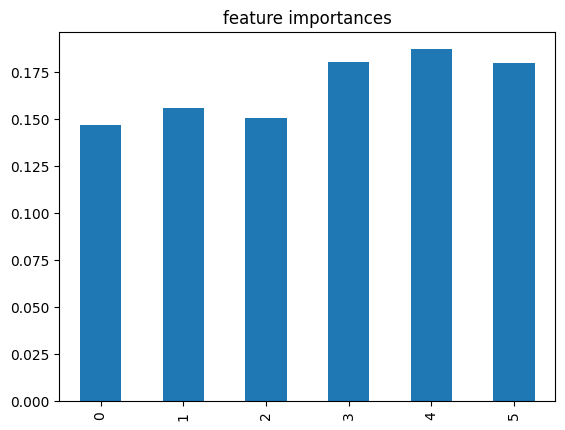

In [63]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

add_performance('logistic regression', y_test, y_predict)

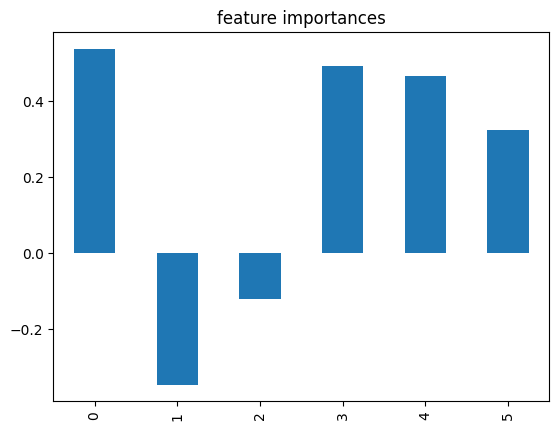

In [65]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

add_performance('random forest', y_test, y_predict)

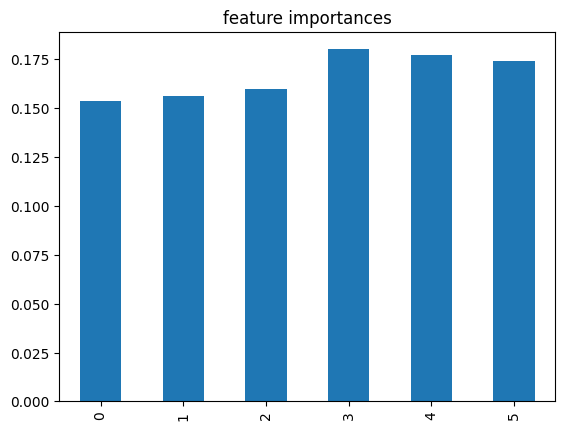

In [67]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Gradient-boosted trees

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_predict = GBC.predict(X_test)

add_performance('gradient-boosted trees', y_test, y_predict)

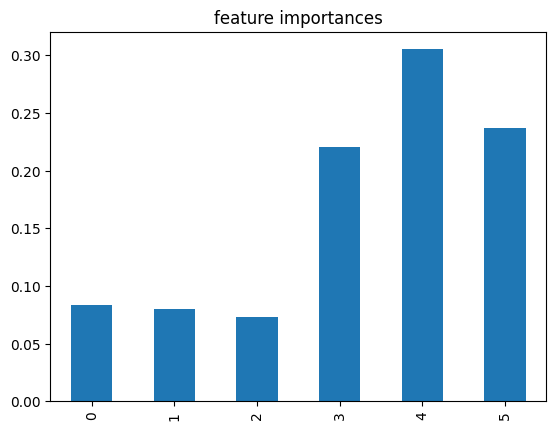

In [69]:
feature_importances = pd.Series(GBC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

add_performance('decision trees', y_test, y_predict)

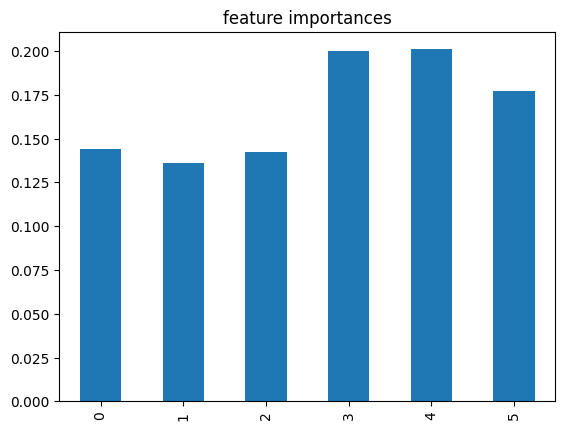

In [71]:
feature_importances = pd.Series(DTC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict = GNB.predict(X_test)

add_performance('naive bayes', y_test, y_predict)

### Support Vector Machines

In [73]:
from sklearn.svm import SVC

SV = SVC()
SV.fit(X_train, y_train)
y_predict = SV.predict(X_test)

add_performance('support vector machine', y_test, y_predict)

### Performance

In [74]:
table_of_performance.to_csv('temp/olist_orders_dataset_autoencoder_supervised_performance.csv', index=False)